# Read in the data

In [149]:
import pandas as pd
import numpy as np
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

**The datasets are in the schools folder. That means the path to ap_2010.csv is schools/ap_2010.csv.
I added each of the dataframes to the dictionary data, using the base of the filename as the key. For example, you'd enter ap_2010 for the file ap_2010.csv.
each key in data should have the corresponding dataframe as its value.**

In [150]:
print(data['sat_results'].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

**There's only a single row for each high school, so each DBN is unique in the SAT data.
We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.**

**let's explore the remaining data inthe Data dictionary**

In [151]:
for i in data:
    print(data[i].iloc[0:5])

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

We can make some observations based on the first few rows of each one.

* Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.
* Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
* Some of the datasets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each dataset. If we don't do this, we'll run into problems when we combine the datasets, because we might be merging two rows in one data set with one row in another dataset.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt)


# Read in the surveys

In [152]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)


In [153]:
print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

There are two immediate facts that we can see in the data:

* There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns makes it easier to print the dataframe out and find correlations within it.
* The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion makes the column name consistent with the other data sets.

The next step is to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we will use the below varaibles in the table which represents survey responses.

In [154]:
survey["DBN"] = survey["dbn"] #rename the dbn column to DBN to match the column with other datasets

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

In [155]:
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


**When we explored all of the datasets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.**

**From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long.**

# Add DBN columns

i'll create a custom function that:

* Takes in a number.
* Converts the number to a string using the str() function.
* Check the length of the string using the len() function.
   * If the string is two digits long, returns the string.
   * If the string is one digit long, adds a 0 to the front of the string, then returns it 
   
**After padding the CSD, i'll use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns to get the DBN column**

In [156]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] #renaming the dbn column to DBN

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [157]:
#Alternatively, we can use the below function
def pad_csd(num):
    return str(num).zfill(2)

# Convert columns to numeric

Now we're almost ready to combine our datasets. Before we do, let's take some time to calculate variables that are useful in our analysis. lets add add the SAT scores together, This makes it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results dataset from the object (string) data type to a numeric data type.

In [158]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# Parsing Geographic Coordinates for Schools

Next, we'll want to parse the latitude and longitude coordinates for each school. This enables us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory dataset.

In [159]:
data['hs_directory']['Location 1'].head()

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
Name: Location 1, dtype: object

We want to extract the coordinates, which are in parentheses at the end of the field. i'll use the string methods split() and replace() methods to extract each coordinate, then add two new column to the dataset one for longitude and the other for latitude. Below i'll create a function to handle this.

In [160]:

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Condense datasets

**The first dataset that we'll condense is class_size**

In [161]:
class_size = data["class_size"]

In [162]:
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32,32K564
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN,32,32K564


Since we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12

In [163]:
class_size = class_size[class_size["GRADE "] == "09-12"]

next i'll filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.

In [164]:
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [165]:
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,32,K,K564,Bushwick Community High School,09-12,GEN ED,SCIENCE,Physics,-,49.0,2.0,24.5,22.0,27.0,STARS,NaN,32,32K564
27605,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Global History & Geography,-,237.0,10.0,23.7,15.0,31.0,STARS,NaN,32,32K564
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564


**The data reveals numerous observations for each District Borough (DBN). To obtain average figures for each numeric variable, I will group the dataset by DBN.**

In [166]:
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)

In [167]:
class_size

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


In [168]:
data["demographics"]["schoolyear"].value_counts()

20112012    1509
20102011    1498
20092010    1475
20082009    1441
20072008    1410
20062007    1386
20052006    1356
Name: schoolyear, dtype: int64

**Filter the "demographics" data, retaining only the rows where the "schoolyear" is 20112012, representing the latest year.**

In [169]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [170]:
data["graduation"]["Cohort"].value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

**A Cohort appears to refer to the year the data represents. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.**

In [171]:
data["graduation"]["Demographic"].unique()

array(['Total Cohort', 'Male', 'English Language Learners',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Asian', 'Black', 'Hispanic',
       'White', 'Female'], dtype=object)

**To obtain data from the full cohort, we'll select rows where the Demographic is Total Cohort**

In [172]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Convert AP scores to numeric

**We are preparing to combine the datasets and the final step is to convert the Advanced Placement (AP) test scores from strings to numeric values. AP exams are taken by high school students before applying to college and are scored on a scale of 1 to 5, with a score of 3 or higher considered passing. Students who score well may receive college credit.**

**AP exams are more common in academically challenging schools, while schools with limited funding or academic rigor tend to have fewer AP exams. It will be interesting to explore the correlation between AP exam scores and SAT scores across different high schools. To do this, we need to convert the AP exam scores in the ap_2010 dataset into numeric values**

In [173]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine the datasets

**Since this project is concerned with determining demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values. Also most of our analysis would be impossible if a significant number of rows was missing from demographics dataset.**

**we still have to merge class_size, demographics, survey, and hs_directory using inner join type becauses these files contain information that's more valuable to our analysis and also have fewer missing DBN values**

In [174]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")



In [175]:
combined.isnull()

,DBN,SCHOOL NAME_x,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,False,False,False,False,False,False,False,True,True,True,...,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,True,True,True,...,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,True,True,True,...,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
10168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
10169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
10170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False


**The merging of datasets produced numerous null values, including some null columns. To address this, I will replace the null values with the mean value of the respective column. For columns with missing values, it is recommended to substitute them with 0.**

In [176]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

# Add a school district column for mapping

**After cleaning and merging the dataset, analyzing the statistics at the school district level can be effective. Adding a column specifying the school district by extracting the first two characters of the DBN facilitates this analysis.**

In [177]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Find correlations

In [178]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations.iloc[0:60])

SAT Critical Reading Avg. Score         0.985064
SAT Math Avg. Score                     0.971335
SAT Writing Avg. Score                  0.985410
sat_score                               1.000000
AP Test Takers                          0.533656
Total Exams Taken                       0.527427
Number of Exams with scores 3 4 or 5    0.468721
Total Cohort                            0.344212
CSD                                     0.091399
NUMBER OF STUDENTS / SEATS FILLED       0.272268
NUMBER OF SECTIONS                      0.246678
AVERAGE CLASS SIZE                      0.172210
SIZE OF SMALLEST CLASS                  0.084243
SIZE OF LARGEST CLASS                   0.157622
SCHOOLWIDE PUPIL-TEACHER RATIO          0.094842
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.706601
total_enrollment                        0.388813
ell_num                                -0.041272
ell_percent         

In [179]:
print(correlations.tail(8))

zip               -0.042736
total_students     0.430410
number_programs    0.156822
priority08              NaN
priority09              NaN
priority10              NaN
lat               -0.135341
lon               -0.117411
Name: sat_score, dtype: float64


**As expected Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.**

Observations:
* Total enrollment has a positive correlation with SAT scores, contrary to expectations for smaller schools. Larger schools tend to perform better.
* Other enrollment-related columns also show similar correlations e.g total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.
* SAT scores correlate positively with the percentage and number of females, while correlating negatively with the percentage and number of males.
* School safety ratings from teachers and students correlate with SAT scores.
* Student ratings of academic standards correlate with SAT scores, but not ratings from teachers and parents.
* Significant racial inequality exists in SAT scores (white_per, asian_per, black_per, hispanic_per).
* The percentage of students eligible for free or reduced school lunch correlates negatively with SAT scores.**

In [180]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline 

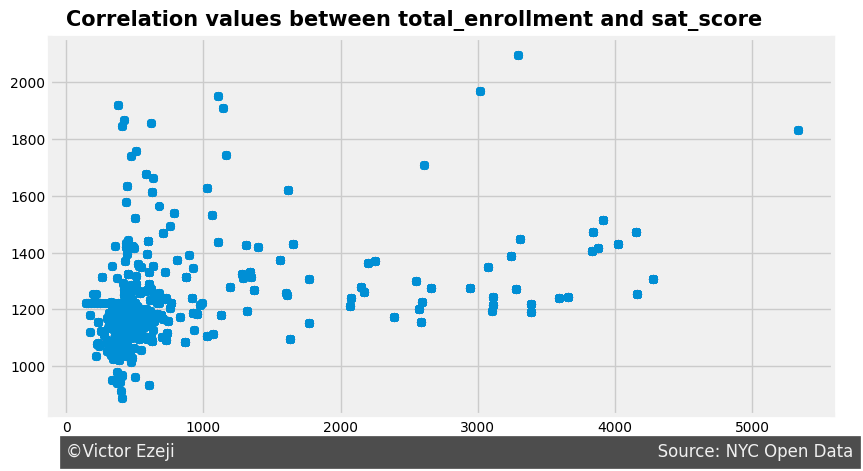

In [181]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(combined['total_enrollment'], combined['sat_score'])
ax.text(0, 680, '©Victor Ezeji' + ' '*92 + 'Source: NYC Open Data',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12)
ax.text(0, 2200, 'Correlation values between total_enrollment and sat_score', weight = 'bold',
        size=15)
plt.show()

The plot we created suggests no strong correlation between sat_score and total_enrollment. Instead, there's a cluster of schools and a few outliers in different directions.

# Plotting survey correlations

There are several fields in combined that origina666lly came from a survey which we saved in survey_fields earlier in this project

In [182]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

In [183]:
survey_fields

['rr_s',
 'rr_t',
 'rr_p',
 'N_s',
 'N_t',
 'N_p',
 'saf_p_11',
 'com_p_11',
 'eng_p_11',
 'aca_p_11',
 'saf_t_11',
 'com_t_11',
 'eng_t_11',
 'aca_t_11',
 'saf_s_11',
 'com_s_11',
 'eng_s_11',
 'aca_s_11',
 'saf_tot_11',
 'com_tot_11',
 'eng_tot_11',
 'aca_tot_11']

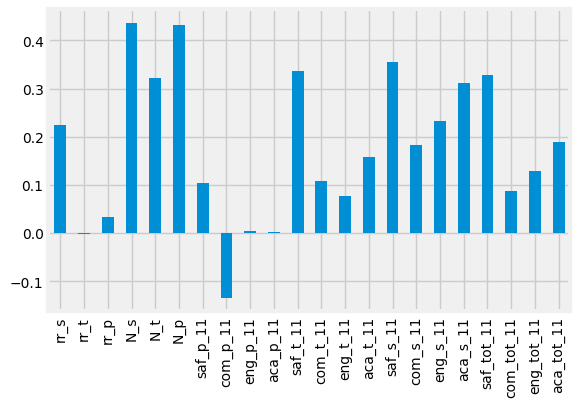

In [184]:
corr.plot.bar()

**since Other enrollment-related columns also show similar correlations e.g total_students, N_s, N_p, N_t,  we will explore  saf_t_11 and saf_s_11, which measure how teachers and students perceive safety at school, which are correlated highly with sat_score.**

## Exploring safety

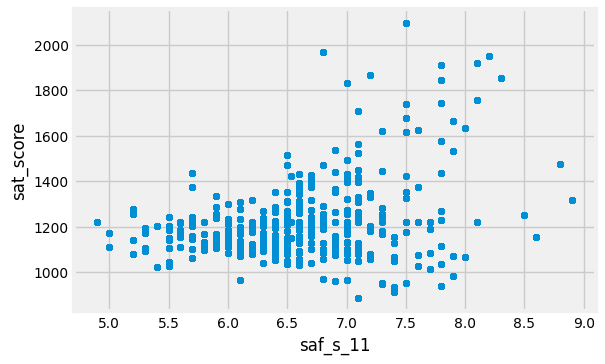

In [185]:
combined.plot.scatter(x = 'saf_s_11', y = 'sat_score')

there appears to be a correlation, but it doesn't look strong

In [186]:
combined['boro'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

## Borough safety

In [187]:
boro_safety = combined.pivot_table(index = 'boro', values ='saf_s_11')

In [188]:
boro_safety

,saf_s_11
boro,
Bronx,6.534549
Brooklyn,6.331908
Manhattan,6.719133
Queens,6.646817
Staten Island,6.426404


Schools in Manhattan and Queens tend to have higher safety ratings compared to those in Brooklyn, which generally have a marginally lower average safety score.

## Exploring race and SAT score

let's visualize the correlation between SAT score and the columns that indicate the percentage of each race at a given school.

In [189]:
combined[['white_per', 'asian_per', 'black_per', 'hispanic_per']]

,white_per,asian_per,black_per,hispanic_per
0,1.7,14.0,29.1,53.8
1,1.7,14.0,29.1,53.8
2,1.7,14.0,29.1,53.8
3,1.7,14.0,29.1,53.8
4,1.7,14.0,29.1,53.8
...,...,...,...,...
10167,0.0,0.9,21.2,77.3
10168,0.0,0.9,21.2,77.3
10169,0.0,0.9,21.2,77.3
10170,0.0,0.9,21.2,77.3


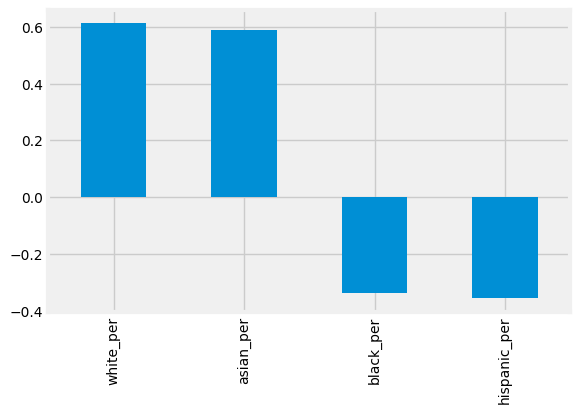

In [190]:
combined.corr()['sat_score'][['white_per', 'asian_per', 'black_per', 'hispanic_per']].plot.bar()

from the above chat it appears a higher percentage of white and asian students in schools positively correlates with the SAT score while black and hispanic students are negatively correlated.

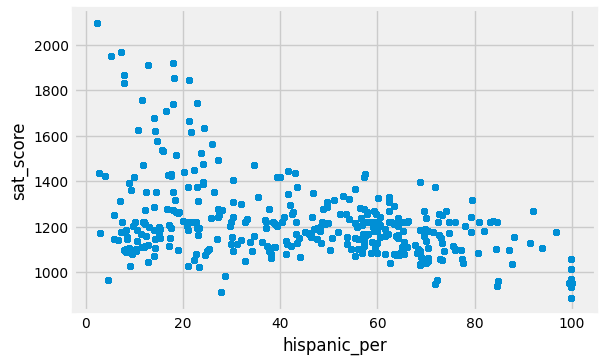

In [191]:
combined.plot.scatter(x = 'hispanic_per', y = 'sat_score')

**From the above scatter plot we can see schools with higher percentage of hispanic students have lower average SAT scores.**

let's explore schools with a Hispanic percentage greater than 95 by researching their names on Wikipedia and Google to discover any interesting aspects about them.

In [192]:
hispanic_sch_over_95 = combined[combined['hispanic_per'] > 95]['SchoolName']

In [193]:
hispanic_sch_over_95.unique()

array(['Manhattan Bridges High School', 0,
       'GREGORIO LUPERON HS SCI & MATH',
       'Academy for Language and Technology',
       'International School for Liberal Arts',
       'Multicultural High School'], dtype=object)

Let's explore NY schools with a hispanic_per less than 10% and an average SAT score greater than 1800.

In [194]:
sch_less_10_hispanic = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SchoolName']

In [195]:
sch_less_10_hispanic.unique()

array(['STUYVESANT HS', 'BRONX HS OF SCIENCE', 'BROOKLYN TECHNICAL HS',
       'Queens HS for Science York Colllege',
       'STATEN ISLAND TECHNICAL HS'], dtype=object)

**Many of the schools above appear to be specialized science and technology schools that receive extra funding and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT.**

## Exploring Gender and SAT Scores

let's explore gender disparities in SAT scores

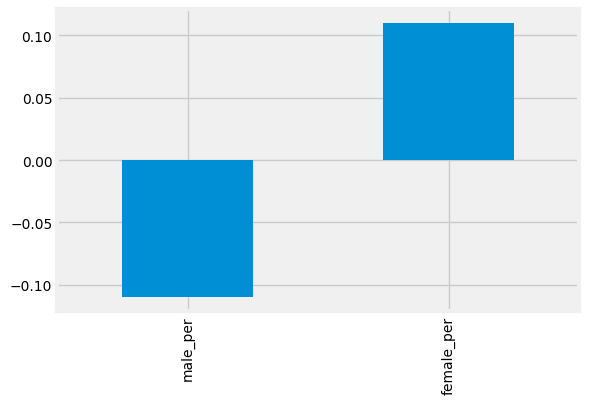

In [196]:
combined.corr()['sat_score'][['male_per', 'female_per']].plot.bar()

**The plot above indicates a positive correlation between schools with more females and the average SAT score, whereas schools with more males show a negative correlation, although it is not strong.**

**lets's investigate this correlation further through a scatter plot.**

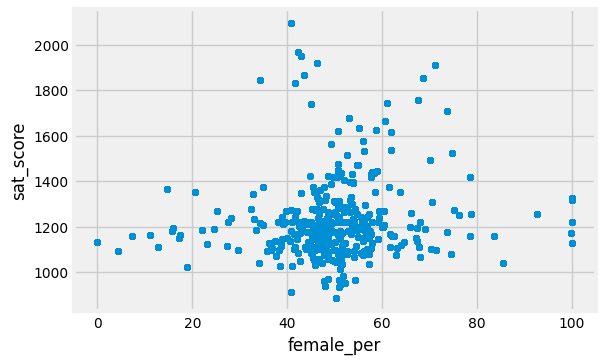

In [197]:
combined.plot.scatter('female_per','sat_score')

**The scatter plot above does not show a clear correlation between female students and SAT scores. However, it indicates that schools with a female student population between 60-80% had higher SAT scores.**

Next step, let's explore schools with a female percentage exceeding 60% and an average SAT score surpassing 1700, Use Wikipedia and Google to research the schools by name.

In [198]:
sch_with_high_female_sat = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SchoolName']

In [199]:
sch_with_high_female_sat.unique()

array([0, 'Eleanor Roosevelt High School', 'BEACON SCHOOL',
       'FIORELLO H.LAGUARDIA HS', 'TOWNSEND HARRIS HS'], dtype=object)

**These schools appear to be very selective liberal arts schools that have high academic standards**

## Exploring AP Scores vs. SAT Scores

**In the U.S., high school students take [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) exams to earn college credit. Let's delve into this relationship further by examining the percentage of students in each school who took at least one AP exam, considering that total enrollment strongly correlates with SAT scores.**

In [200]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

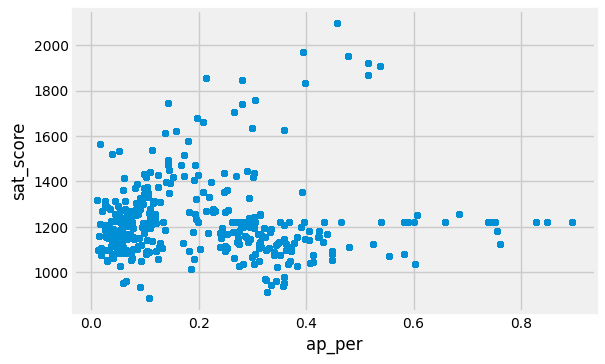

In [201]:
combined.plot.scatter('ap_per', 'sat_score')

**The correlation between AP Test Takers and SAT scores appears uncertain.**

## Exploring class size and SAT scores

In [202]:
plt.style.use('default')

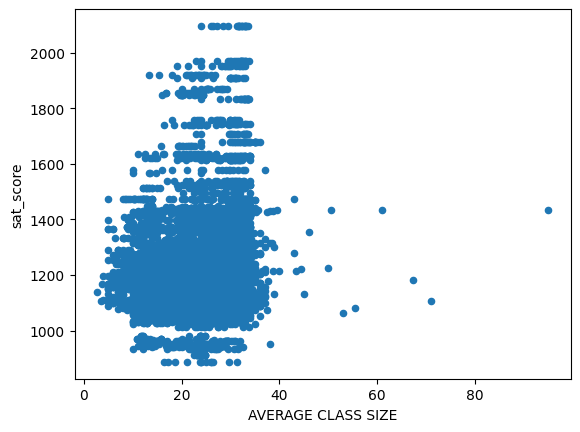

In [203]:
combined.plot.scatter('AVERAGE CLASS SIZE', 'sat_score')

No correlation exists between both variables.

**Next we will explore neighourhoods that have the best SAT scores.**

In [204]:
combined['sat_score'].describe()

count    10172.000000
mean      1221.971658
std        159.206612
min        887.000000
25%       1116.000000
50%       1192.000000
75%       1270.000000
max       2096.000000
Name: sat_score, dtype: float64

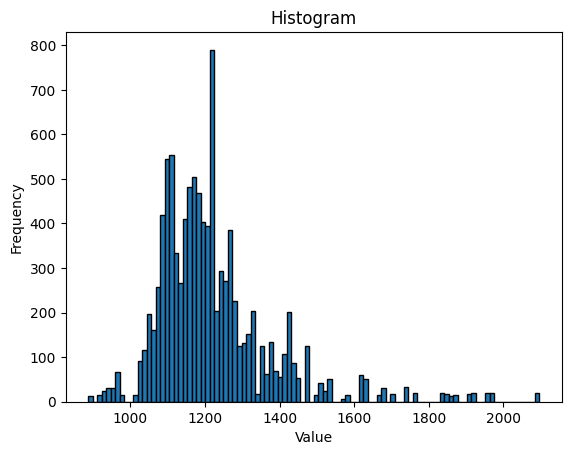

In [205]:
plt.hist(combined['sat_score'], bins=100,edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

**let's Filter the data to select SAT scores between 1600 and 2096 and determine the corresponding districts.**

In [206]:
high_sat_combined = combined[(combined['sat_score'] >= 1600) & (combined['sat_score'] <= 2100)]

In [207]:
value_counts = high_sat_combined['boro'].value_counts()

In [208]:
value_counts

Manhattan        193
Queens            71
Brooklyn          64
Bronx             40
Staten Island     19
Name: boro, dtype: int64

In [209]:
total_count = value_counts.values.sum()
Percentage = (value_counts.loc['Manhattan'] / total_count) * 100

In [210]:
Percentage

49.87080103359173

**48% top-scoring SAT students are located in Manhattan Borough, followed by Queens.**

Let's check for additional correlation after filtering the dataset.

In [211]:
high_sat_combined_corr = high_sat_combined.corr()
print(high_sat_combined_corr['sat_score'].iloc[0:60])

SAT Critical Reading Avg. Score         0.984237
SAT Math Avg. Score                     0.955027
SAT Writing Avg. Score                  0.973468
sat_score                               1.000000
AP Test Takers                          0.543808
Total Exams Taken                       0.560753
Number of Exams with scores 3 4 or 5    0.637282
Total Cohort                            0.489587
CSD                                     0.079550
NUMBER OF STUDENTS / SEATS FILLED       0.373875
NUMBER OF SECTIONS                      0.378899
AVERAGE CLASS SIZE                      0.092691
SIZE OF SMALLEST CLASS                 -0.122568
SIZE OF LARGEST CLASS                   0.162262
SCHOOLWIDE PUPIL-TEACHER RATIO          0.066484
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.047153
total_enrollment                        0.362431
ell_num                                -0.469042
ell_percent         

In [212]:
high_sat_combined_corr.tail()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon,ap_per
priority09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
priority10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.244901,0.154551,0.259522,0.223475,-0.042394,-0.003757,0.025164,-0.017864,-0.395859,0.017021,...,NaN,-0.288954,-0.024463,0.117822,NaN,NaN,NaN,1.000000,0.385524,-0.044380
lon,0.104311,0.074966,0.105134,0.096849,-0.065742,-0.072628,-0.075673,-0.132953,0.321758,-0.060136,...,NaN,0.594472,-0.158857,-0.092900,NaN,NaN,NaN,0.385524,1.000000,0.402257
ap_per,0.704843,0.742324,0.711304,0.742400,0.442349,0.432086,0.464260,0.348125,0.555845,0.257505,...,NaN,0.540816,0.209369,-0.080317,NaN,NaN,NaN,-0.044380,0.402257,1.000000


**A strong correlation between the percentage of students who took advanced placement tests (AP_per) and SAT scores is evident, which will be visually represented through a scatter plot.**

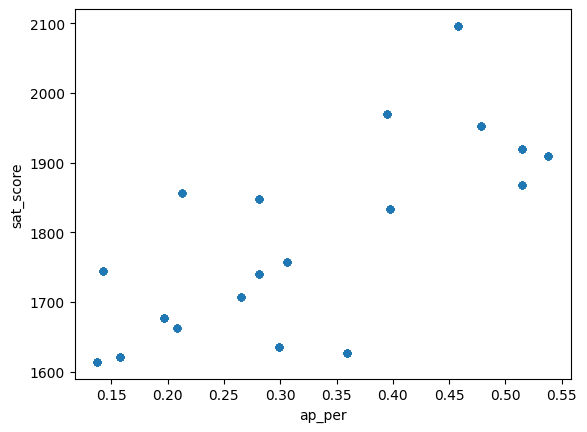

In [213]:
high_sat_combined.plot.scatter('ap_per', 'sat_score')

**The scatter plot reveals a positive correlation between the percentage of students taking advance placement exams (ap_per) and SAT scores, indicating that higher SAT scores are associated with a greater participation in advance placement exams.**

# Conclusion

In this analysis, we set out to find correlation between SAT scores and factors like race, gender etc. it appears a higher percentage of white and asian students in schools positively correlates with the SAT score while black and hispanic students are negatively correlated.

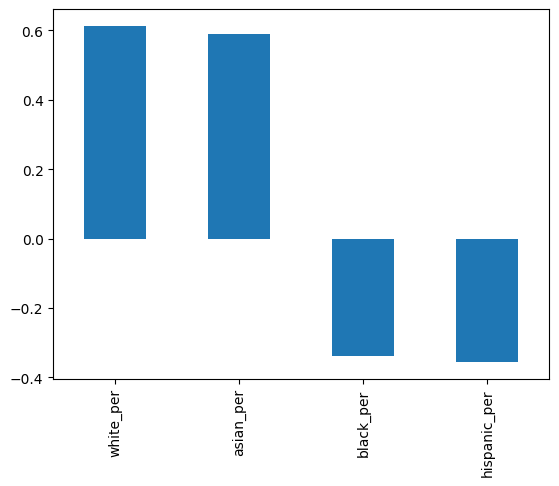

In [214]:
combined.corr()['sat_score'][['white_per', 'asian_per', 'black_per', 'hispanic_per']].plot.bar()

**Also, higher SAT scores were strongly positively correlated with a greater participation in advance placement exams, as indicated by the percentage of students taking advance placement exams (ap_per).**